In [1]:
import pandas as pd
loc26= pd.read_csv('26-17.01.29-02.04.csv')
print(loc26)

     Unnamed: 0   Unnamed: 1            Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                   NaN        NaN   
1           NaN     SITE NO:  26 - Stenhouse Drive        NaN   
2           NaN        Date:              29/01/17        NaN   
3           NaN   Direction:                              NaN   
4           NaN          NaN                   NaN        NaN   
5           NaN         Hour                   P/C    P/C Kph   
6           NaN  00.00-00.59                     1         22   
7           NaN  01.00-01.59                     0          0   
8           NaN  02.00-02.59                     0          0   
9           NaN  03.00-03.59                     0          0   
10          NaN  04.00-04.59                     1         21   
11          NaN  05.00-05.59                     1         10   
12          NaN  06.00-06.59                     0          0   
13          NaN  07.00-07.59                     1         14   
14          NaN  08.00-08

In [2]:
loc26 = loc26.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Stenhouse Drive - DAILY FLOW BY HOUR')
loc26.drop(loc26.index[[0,1,2,3,4,5]], inplace=True)
loc26.drop(loc26.columns[[0,5]], axis=1, inplace=True)
loc26.index = loc26.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc26.rename(columns=newcols, inplace=True)
loc26

Stenhouse Drive - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,1,22,3
1,01.00-01.59,0,0,0
2,02.00-02.59,0,0,0
3,03.00-03.59,0,0,0
4,04.00-04.59,1,21,0
5,05.00-05.59,1,10,2
6,06.00-06.59,0,0,3
7,07.00-07.59,1,14,3
8,08.00-08.59,0,0,3
9,09.00-09.59,6,13,8


In [3]:
loc26['Hourstarts'] = loc26.Hour.str.split('-').str.get(0)
loc26['Hourends'] = loc26.Hour.str.split('-').str.get(1)
loc26.drop(loc26.columns[0], axis=1, inplace=True)

In [4]:
loc26.to_csv('Loc26.csv')
loc26 = loc26.dropna(how='all')
loc26 = loc26[loc26.Hourstarts != "Direction:"]
loc26 = loc26[loc26.Hourstarts != "Total"]
loc26 = loc26[loc26.Hourstarts != "Hour"]
loc26 = loc26[loc26.Hourstarts != "Date:"]

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
loc26[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc26[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [7]:
loc26day1 = loc26.iloc[0:24]
loc26day2 = loc26.iloc[24:48]
loc26day3 = loc26.iloc[48:72]
loc26day4 = loc26.iloc[72:96]
loc26day5 = loc26.iloc[96:120]
loc26day6 = loc26.iloc[120:144]
loc26day7 = loc26.iloc[144:168]
#my data is divided into 7 clean sets

In [8]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

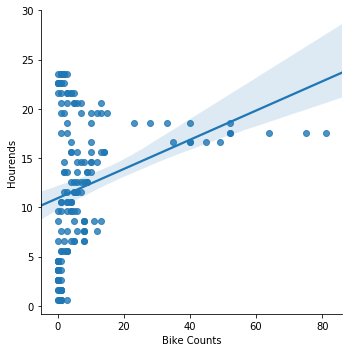

In [9]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc26)

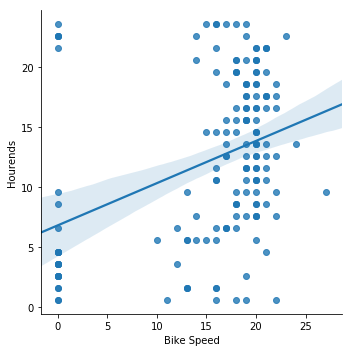

In [10]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc26)

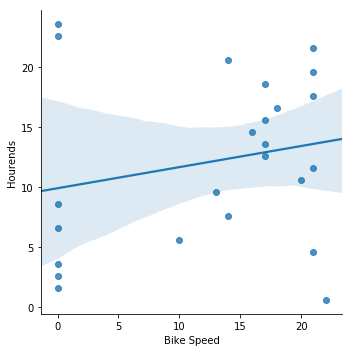

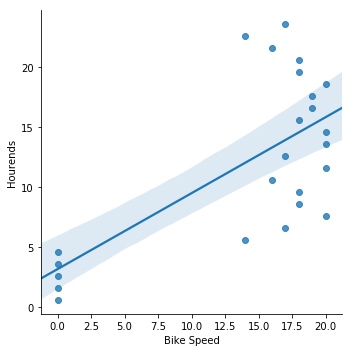

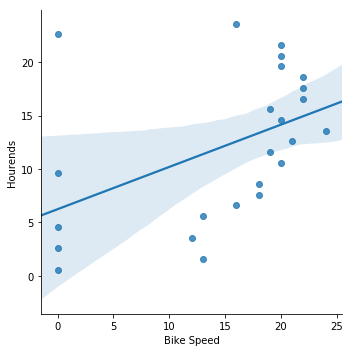

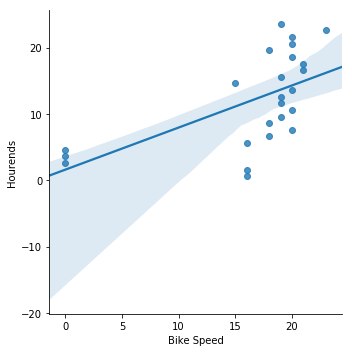

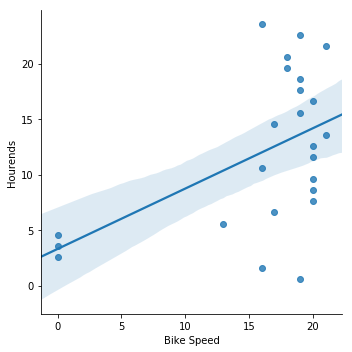

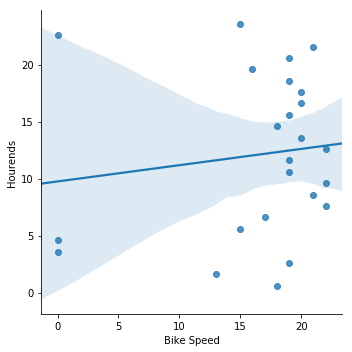

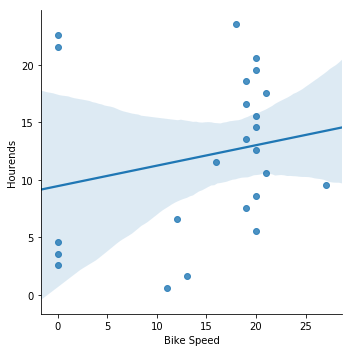

In [11]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc26day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc26day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc26day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc26day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc26day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc26day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc26day7)

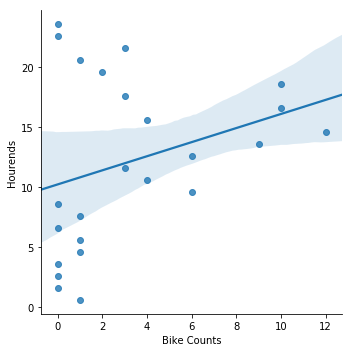

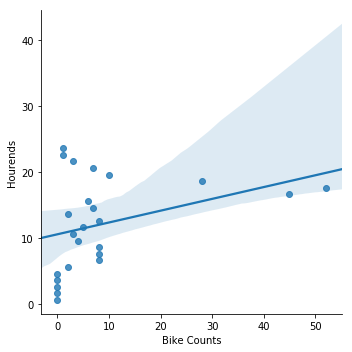

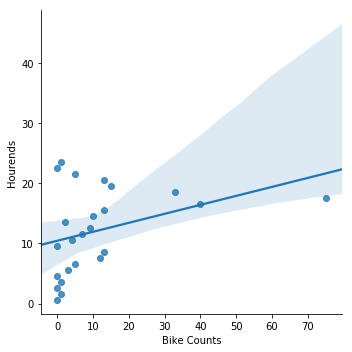

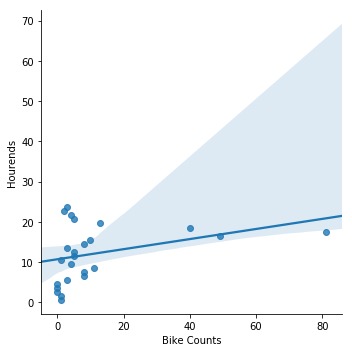

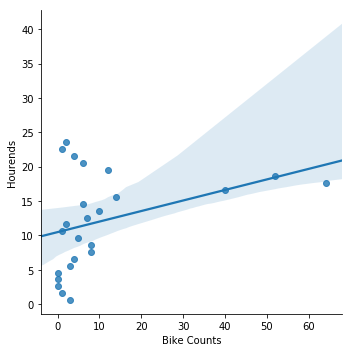

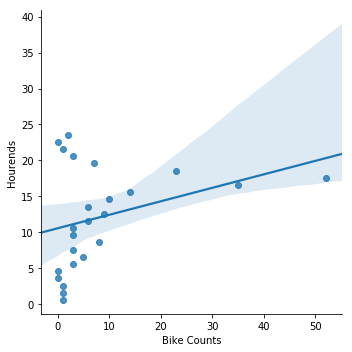

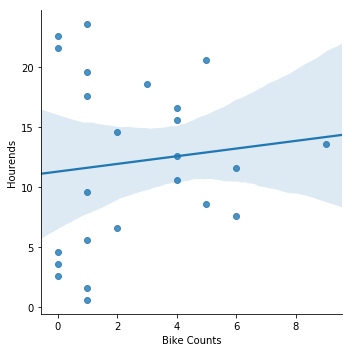

In [12]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc26day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc26day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc26day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc26day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc26day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc26day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc26day7)